In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dat=np.load('embs.npy')

In [3]:
print(dat.shape)

(35781, 100)


In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cebra.datasets
from cebra import CEBRA

#for model saving:
import os
import tempfile
from pathlib import Path

cebra_model = CEBRA(
    model_architecture="offset10-model", #consider: "offset10-model-mse" if Euclidean
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    max_iterations=5000, #we will sweep later; start with default
    conditional='time', #for supervised, put 'time_delta', or 'delta'
    output_dimension=3,
    distance='cosine', #consider 'euclidean'; if you set this, output_dimension min=2
    device="cpu",
    verbose=True,
    time_offsets=10
)

/home/maria/Neurogarage2/.venv/lib/python3.12/site-packages/cebra/datasets/__init__.py:103: UserWarning: Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.
  warnings.warn(f"Could not initialize one or more datasets: {e}. "


In [17]:
cebra_time_full_model = cebra_model.fit(dat[:1000])
# transform
cebra_time_full = cebra_model.transform(dat[:1000])
# GoF
#gof_full = cebra.sklearn.metrics.goodness_of_fit_score(cebra_time_full_model, dat)
#print(" GoF in bits - full:", gof_full)
# plot embedding
#fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_time_full, title = "CEBRA-Time (full)", markersize=3, cmap = "rainbow")
#fig.show()
# plot the loss curve
#ax = cebra.plot_loss(cebra_time_full_model)

pos: -0.8457 neg:  6.3691 total:  5.5234 temperature:  1.1200: 100%|██████████| 5000/5000 [04:12<00:00, 19.80it/s]


In [18]:
print(cebra_time_full.shape)

(1000, 3)


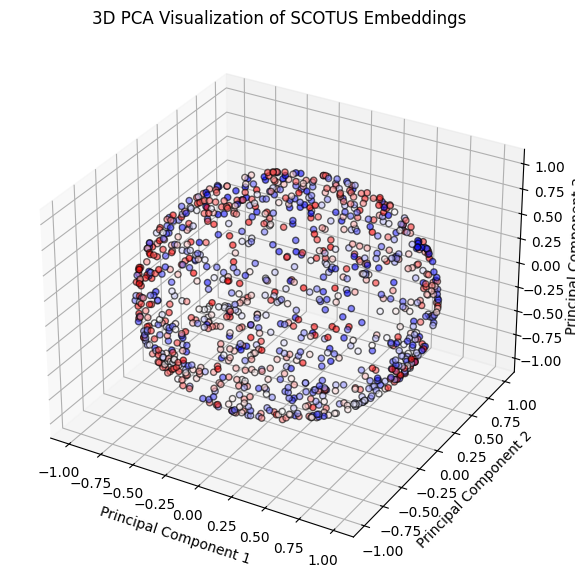

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cebra_time_full[:1000, 0], cebra_time_full[:1000, 1], cebra_time_full[:1000, 2], c=range(1000),alpha=0.6, edgecolors='k',cmap='bwr')

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization of SCOTUS Embeddings")

plt.show()

In [16]:
import cebra
#gof_full = cebra.sklearn.metrics.goodness_of_fit_score(cebra_time_full_model, dat)
#print(" GoF in bits - full:", gof_full)
# plot embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_time_full, title = "CEBRA-Time (full)", markersize=3, cmap = "rainbow")
fig.show()
# plot the loss curve
ax = cebra.plot_loss(cebra_time_full_model)

AttributeError: module 'cebra.integrations' has no attribute 'plotly'